In [1]:
# Using TFlow 2.0 to assess Autoregressive vs Simple RNNs for artificial time series data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
# Generate sine curve for fake data with noise

data = np.sin(0.05*np.arange(500)) + np.random.randn(500)*0.5

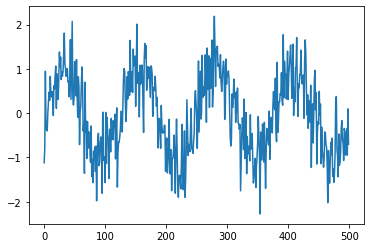

In [3]:
plt.plot(data)

In [4]:
# Building dataset

T = 50 # T past timesteps used for predictions
X = []
Y = []

for t in range(len(data)-T):
    x = data[t:t+T]
    y = data[t+T]
    X.append(x)
    Y.append(y)
    
X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
print(f"X shape is {X.shape} and Y shape is {Y.shape}")

X shape is (450, 50) and Y shape is (450,)


In [5]:
# Making autoregressive model

i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)

model.compile(loss='mse', optimizer=Adam(lr=0.01))

# Train model -> splitting at 0.3 and validates at 0.3

r = model.fit(X[:-N//3], Y[:-N//3],
             epochs = 100,
             validation_data = (X[-N//3:], Y[-N//3:]))

Epoch 1/100
10/10 [==============================] - 0s 34ms/step - loss: 1.0187 - val_loss: 0.6053
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.7303 - val_loss: 0.5026
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.5839 - val_loss: 0.4696
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.5003 - val_loss: 0.4237
Epoch 5/100
10/10 [==============================] - 0s 12ms/step - loss: 0.4533 - val_loss: 0.3945
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.3968 - val_loss: 0.3735
Epoch 7/100
10/10 [==============================] - 0s 12ms/step - loss: 0.3576 - val_loss: 0.3564
Epoch 8/100
10/10 [==============================] - 0s 10ms/step - loss: 0.3308 - val_loss: 0.3453
Epoch 9/100
10/10 [==============================] - 0s 11ms/step - loss: 0.3026 - val_loss: 0.3396
Epoch 10/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2840 - val_loss: 0.3362
Epo

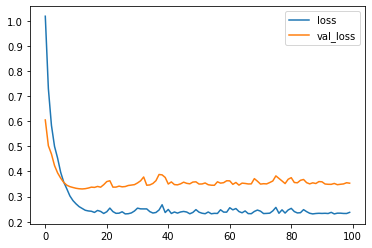

In [6]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [7]:
# Wrong way to predict: Forecast using true targets

val_target = Y[-N//3:]
val_pred = []

# Index for 1st validation point

i = -N//3

while len(val_pred) < len(val_target):
    pred = model.predict(X[i].reshape(1,-1))[0,0] # Need a scalar = 1x1 array
    i+=1
    
    # Update preds
    val_pred.append(pred)

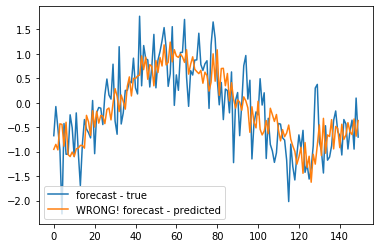

In [8]:
# Wrong method plot

plt.plot(val_target, label = 'forecast - true')
plt.plot(val_pred, label = 'WRONG! forecast - predicted')
plt.legend()

In [9]:
# Right way to predict: Forecast using self-predicted targets

val_target = Y[-N//3:]
val_pred = []

# Index for 1st validation point

prev_x = X[-N//3] # this is a 1D array of length T

while len(val_pred) < len(val_target):
    pred = model.predict(prev_x.reshape(1,-1))[0,0] # Need a scalar = 1x1 array
    
    # Update preds
    val_pred.append(pred)
    
    # Update inputs
    prev_x = np.roll(prev_x,-1)
    prev_x[-1] = pred

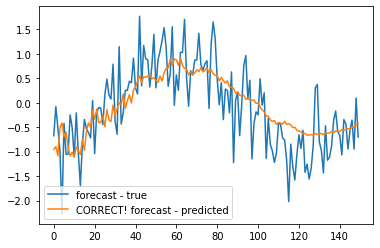

In [10]:
# Correct method -> plot not as good!

plt.plot(val_target, label = 'forecast - true')
plt.plot(val_pred, label = 'CORRECT! forecast - predicted')
plt.legend()

In [21]:
# Now using Simple RNNs

# Making Model

i = Input(shape=(T,1))
x = SimpleRNN(5, activation = 'tanh')(i)
x = Dense(1)(x)
model = Model(i,x)

model.compile(loss='mse', optimizer=Adam(lr=0.01))

# Train model -> splitting at 0.3 and validates at 0.3

r = model.fit(X[:-N//3], Y[:-N//3],
             epochs = 100,
             validation_data = (X[-N//3:], Y[-N//3:]))

Epoch 1/100
10/10 [==============================] - 1s 56ms/step - loss: 1.1636 - val_loss: 0.6352
Epoch 2/100
10/10 [==============================] - 0s 31ms/step - loss: 0.5642 - val_loss: 0.3956
Epoch 3/100
10/10 [==============================] - 0s 32ms/step - loss: 0.4166 - val_loss: 0.3822
Epoch 4/100
10/10 [==============================] - 0s 27ms/step - loss: 0.3927 - val_loss: 0.3425
Epoch 5/100
10/10 [==============================] - 0s 32ms/step - loss: 0.3638 - val_loss: 0.3368
Epoch 6/100
10/10 [==============================] - 0s 34ms/step - loss: 0.3525 - val_loss: 0.3339
Epoch 7/100
10/10 [==============================] - 0s 31ms/step - loss: 0.3491 - val_loss: 0.3304
Epoch 8/100
10/10 [==============================] - 0s 32ms/step - loss: 0.3397 - val_loss: 0.3300
Epoch 9/100
10/10 [==============================] - 0s 32ms/step - loss: 0.3357 - val_loss: 0.3265
Epoch 10/100
10/10 [==============================] - 0s 48ms/step - loss: 0.3307 - val_loss: 0.3237

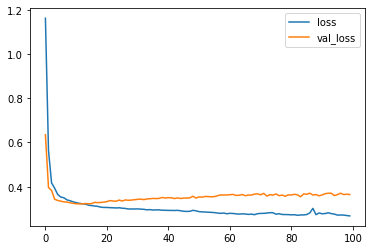

In [26]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [28]:
# Wrong way to predict: Forecast using true targets

val_target = Y[-N//3:]
val_pred = []

# Index for 1st validation point

i = -N//3

while len(val_pred) < len(val_target):
    pred = model.predict(X[i].reshape(1,-1,1))[0,0] # Need a scalar = 1x1 array
    i+=1
    
    # Update preds
    val_pred.append(pred)

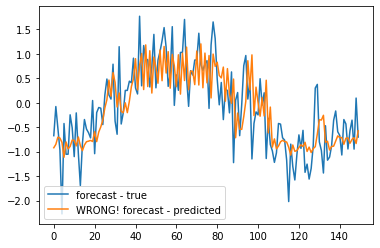

In [30]:
# Wrong method plot

plt.plot(val_target, label = 'forecast - true')
plt.plot(val_pred, label = 'WRONG! forecast - predicted')
plt.legend()

In [31]:
# Right way to predict: Forecast using self-predicted targets

val_target = Y[-N//3:]
val_pred = []

# Index for 1st validation point

prev_x = X[-N//3] # this is a 1D array of length T

while len(val_pred) < len(val_target):
    pred = model.predict(prev_x.reshape(1,-1,1))[0,0] # Need a scalar = 1x1 array
    
    # Update preds
    val_pred.append(pred)
    
    # Update inputs
    prev_x = np.roll(prev_x,-1)
    prev_x[-1] = pred

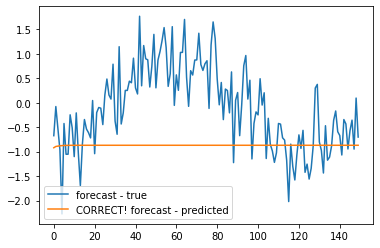

In [32]:
# Correct method -> plot not as good!

plt.plot(val_target, label = 'forecast - true')
plt.plot(val_pred, label = 'CORRECT! forecast - predicted')
plt.legend()